# <span style="color:#FFD700">DIPESH SINGH<br> KCE080BCT008</span>

### About Dataset
Used Car Price Prediction Dataset is a comprehensive collection of automotive information extracted from the popular automotive marketplace website, https://www.cars.com. This dataset comprises 4,009 data points, each representing a unique vehicle listing, and includes nine distinct features providing valuable insights into the world of automobiles.

#### Features

* Brand & Model: Identify the brand or company name along with the specific model of each vehicle.
* Model Year: Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
* Mileage: Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
* Fuel Type: Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.
* Engine Type: Understand the engine specifications, shedding light on performance and efficiency.
* Transmission: Determine the transmission type, whether automatic, manual, or another variant.
* Exterior & Interior Colors: Explore the aesthetic aspects of the vehicles, including exterior and interior color options.
* Accident History: Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.
* Clean Title: Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.
* Price: Access the listed prices for each vehicle, aiding in price comparison and budgeting.<br>
<p>This dataset is a valuable resource for automotive enthusiasts, buyers, and researchers interested in analyzing trends, making informed purchasing decisions or conducting studies related to the automotive industry and consumer preferences. Whether you are a data analyst, car buyer, or researcher, this dataset offers a wealth of information to explore and analyze.</P>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('used_cars.csv')


In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


#### <span style="color:#1B98E0">Data Cleaning</span>

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [6]:
#filling null in accident column with 'None reported'
df['accident'].fillna('None reported',inplace=True)
#filling clean_title with 
df['clean_title'].fillna('No',inplace=True)
#removing rows with empty fuel  type
df.dropna(subset=['fuel_type'],inplace=True)



In [7]:
df.shape

(3839, 12)

In [8]:
df['brand'].unique()


array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar', 'Mercedes-Benz',
       'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia', 'Jeep',
       'Bentley', 'Honda', 'MINI', 'Porsche', 'Hummer', 'Chrysler',
       'Volvo', 'Cadillac', 'Lamborghini', 'Maserati', 'Volkswagen',
       'Subaru', 'GMC', 'RAM', 'Alfa', 'Ferrari', 'Scion', 'Mitsubishi',
       'Mazda', 'Saturn', 'Bugatti', 'Rolls-Royce', 'McLaren', 'Buick',
       'Lotus', 'Pontiac', 'FIAT', 'Saab', 'Mercury', 'Plymouth', 'smart',
       'Maybach', 'Suzuki'], dtype=object)

In [9]:
df["milage"]=df["milage"].str.replace(r'[^0-9]','',regex=True)
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,"$34,999"


In [10]:
df['fuel_type'].unique()
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [11]:
#filtering fuel type by not including inputs with ('-' & 'not supported')
df=df[~df["fuel_type"].isin(["-", "not supported"])]


In [12]:
plug_in_hybrid_data = df[df['fuel_type'] == 'Plug-In Hybrid']
plug_in_hybrid_data.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
60,Volvo,XC90 Hybrid T8 R-Design,2018,40000,Plug-In Hybrid,400.0HP 2.0L 4 Cylinder Engine Plug-In Electri...,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$42,000"
103,BMW,i8 Base,2019,41500,Plug-In Hybrid,369.0HP 1.5L 3 Cylinder Engine Plug-In Electri...,Transmission w/Dual Shift Mode,White,Black,None reported,Yes,"$86,000"
124,Porsche,Cayenne E-Hybrid S,2016,96000,Plug-In Hybrid,416.0HP 3.0L V6 Cylinder Engine Plug-In Electr...,Transmission w/Dual Shift Mode,White,Red,At least 1 accident or damage reported,Yes,"$23,000"
239,Lincoln,Corsair Grand Touring,2021,1850,Plug-In Hybrid,266.0HP 2.5L 4 Cylinder Engine Plug-In Electri...,CVT Transmission,Silver,Beige,None reported,Yes,"$49,000"
293,BMW,i8 Base,2015,846,Plug-In Hybrid,357.0HP 1.5L 3 Cylinder Engine Plug-In Electri...,A/T,White,White,None reported,Yes,"$86,999"


In [13]:
df['engine'].value_counts()

engine
2.0L I4 16V GDI DOHC Turbo                               52
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             48
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             47
–                                                        45
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    44
                                                         ..
148.0HP 3.0L V6 Cylinder Engine Gasoline Fuel             1
134.0HP 1.8L 4 Cylinder Engine Plug-In Electric/Gas       1
362.0HP 5.4L 8 Cylinder Engine Gasoline Fuel              1
281.0HP 2.5L 4 Cylinder Engine Gasoline Fuel              1
139.0HP 1.6L 4 Cylinder Engine Gas/Electric Hybrid        1
Name: count, Length: 1096, dtype: int64

In [14]:
#extracting necessary features from engine

In [15]:
df["horsepower"] = df["engine"].str.extract(r"(\d+\.?\d*)HP")
df["size"] = df["engine"].str.extract(r"(\d+\.?\d*)L")
df["cylinders"] = df["engine"].str.extract(r"(\d+)\sCylinder")

In [16]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,size,cylinders
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300",300.0,3.7,6
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005",NaN,3.8,NaN
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,"$54,598",NaN,NaN,NaN
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500",354.0,3.5,6
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,"$34,999",NaN,2.0,NaN


In [17]:
df['brand'].value_counts()

brand
Ford             374
BMW              370
Mercedes-Benz    312
Chevrolet        287
Toyota           196
Audi             194
Porsche          192
Lexus            163
Jeep             143
Land             130
Nissan           111
Cadillac         106
RAM               91
GMC               90
Dodge             90
Kia               72
Hyundai           69
Acura             64
Mazda             64
Subaru            64
Honda             63
INFINITI          59
Volkswagen        56
Lincoln           52
Jaguar            47
Volvo             37
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Mitsubishi        20
Genesis           20
Alfa              19
Hummer            16
Pontiac           15
Ferrari           12
Rolls-Royce       11
Aston              9
Scion              6
McLaren            6
Saturn             5
Lotus              4
FIAT               4
Mercury            3
Saab               2
Bugatti

In [18]:
df.dropna(subset=['horsepower','size','cylinders'],inplace=True)
df.tail()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,size,cylinders
4002,Mercedes-Benz,AMG GLS 63 4MATIC,2023,2000,Hybrid,603.0HP 4.0L 8 Cylinder Engine Gasoline/Mild E...,9-Speed A/T,Gray,Beige,None reported,Yes,"$175,000",603.0,4.0,8
4003,Mercedes-Benz,E-Class E 300 4MATIC,2018,53705,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,Yes,"$25,900",241.0,2.0,4
4005,Audi,S4 3.0T Premium Plus,2022,10900,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900",349.0,3.0,6
4007,Ford,F-150 Raptor,2020,33000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999",450.0,3.5,6
4008,BMW,X3 xDrive30i,2020,43000,Gasoline,248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Brown,At least 1 accident or damage reported,Yes,"$40,000",248.0,2.0,4


In [19]:
#since we have extracted all the necessary feature from the column 'engine' so we can now drop the engine column
df.drop(columns='engine',inplace=True)
df.head(3) 

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,size,cylinders
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300",300.0,3.7,6
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,7-Speed A/T,Black,Black,None reported,Yes,"$15,500",354.0,3.5,6
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000",292.0,2.0,4


In [20]:
df['transmission'].value_counts()

transmission
A/T                               931
8-Speed A/T                       405
Transmission w/Dual Shift Mode    396
6-Speed A/T                       360
6-Speed M/T                       241
7-Speed A/T                       209
10-Speed A/T                      119
5-Speed A/T                        84
9-Speed A/T                        72
4-Speed A/T                        68
CVT Transmission                   62
5-Speed M/T                        53
M/T                                40
7-Speed M/T                        10
Transmission Overdrive Switch       7
Name: count, dtype: int64

In [21]:
df.shape

(3057, 14)

In [22]:
def group_transmission_type(trans):
    if 'A/T' in trans:
        return 'Automatic'
    elif 'M/T' in trans:
        return 'Manual'
    elif 'CVT' in trans:
        return 'CVT'
    elif 'w/Dual' in trans:
        return 'Dual'
    else:
        return 'Other'

# Apply the grouping function
df['transmission'] = df['transmission'].apply(group_transmission_type)
#transmission feature will only conatain (automatic,manual CVT and Dual)
df = df[~df['transmission'].isin(['Other'])]


In [23]:
df['transmission'].value_counts()

transmission
Automatic    2248
Dual          396
Manual        344
CVT            62
Name: count, dtype: int64

In [24]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,size,cylinders
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,Automatic,Black,Black,At least 1 accident or damage reported,Yes,"$10,300",300.0,3.7,6
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,Automatic,Black,Black,None reported,Yes,"$15,500",354.0,3.5,6
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,Automatic,Blue,Black,None reported,Yes,"$31,000",292.0,2.0,4
7,BMW,740 iL,2001,242000,Gasoline,Automatic,Green,Green,None reported,Yes,"$7,300",282.0,4.4,8
8,Lexus,RC 350 F Sport,2021,23436,Gasoline,Automatic,Black,Black,None reported,Yes,"$41,927",311.0,3.5,6


In [25]:
df['accident'].value_counts()

accident
None reported                             2178
At least 1 accident or damage reported     872
Name: count, dtype: int64

In [26]:
df["price"]=df["price"].str.replace(r'[^0-9]','',regex=True)


In [27]:
#use in eda
# accident_mapping = {
#     'None reported': 0,
#     'At least 1 accident or damage reported': 1
# }

# df['accident'] = df['accident'].map(accident_mapping)
# df.head()

In [28]:
df['clean_title'].value_counts()

clean_title
Yes    2970
No       80
Name: count, dtype: int64

In [29]:
#use in EDA
# #A clean title is important to buyers because it generally implies the vehicle has not suffered severe damage or 
# # issues that could affect its safety, performance, or value.
# clean_title_mapping = {
#     'Yes': 1,
#     'No': 0,
# }

# df['clean_title'] = df['clean_title'].map(clean_title_mapping)
# df.head()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3050 entries, 0 to 4008
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3050 non-null   object
 1   model         3050 non-null   object
 2   model_year    3050 non-null   int64 
 3   milage        3050 non-null   object
 4   fuel_type     3050 non-null   object
 5   transmission  3050 non-null   object
 6   ext_col       3050 non-null   object
 7   int_col       3050 non-null   object
 8   accident      3050 non-null   object
 9   clean_title   3050 non-null   object
 10  price         3050 non-null   object
 11  horsepower    3050 non-null   object
 12  size          3050 non-null   object
 13  cylinders     3050 non-null   object
dtypes: int64(1), object(13)
memory usage: 357.4+ KB


In [31]:
dulicated_data = df.duplicated()
print(dulicated_data.sum())

0


In [32]:
df.shape

(3050, 14)

In [33]:
df['milage'] = pd.to_numeric(df['milage'], errors='coerce')
df['model'] = df['model'].astype(str)
df['fuel_type'] = df['fuel_type'].astype('category')
df['transmission'] = df['transmission'].astype('category')
df['ext_col'] = df['ext_col'].astype('category')
df['int_col'] = df['int_col'].astype('category')
df['accident'] = df['accident'].astype('category')
df['clean_title'] = df['clean_title'].astype('category')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['size'] = pd.to_numeric(df['size'], errors='coerce')
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')


EDA

Univeriate analysis
Analyzing the distibution of numerical features


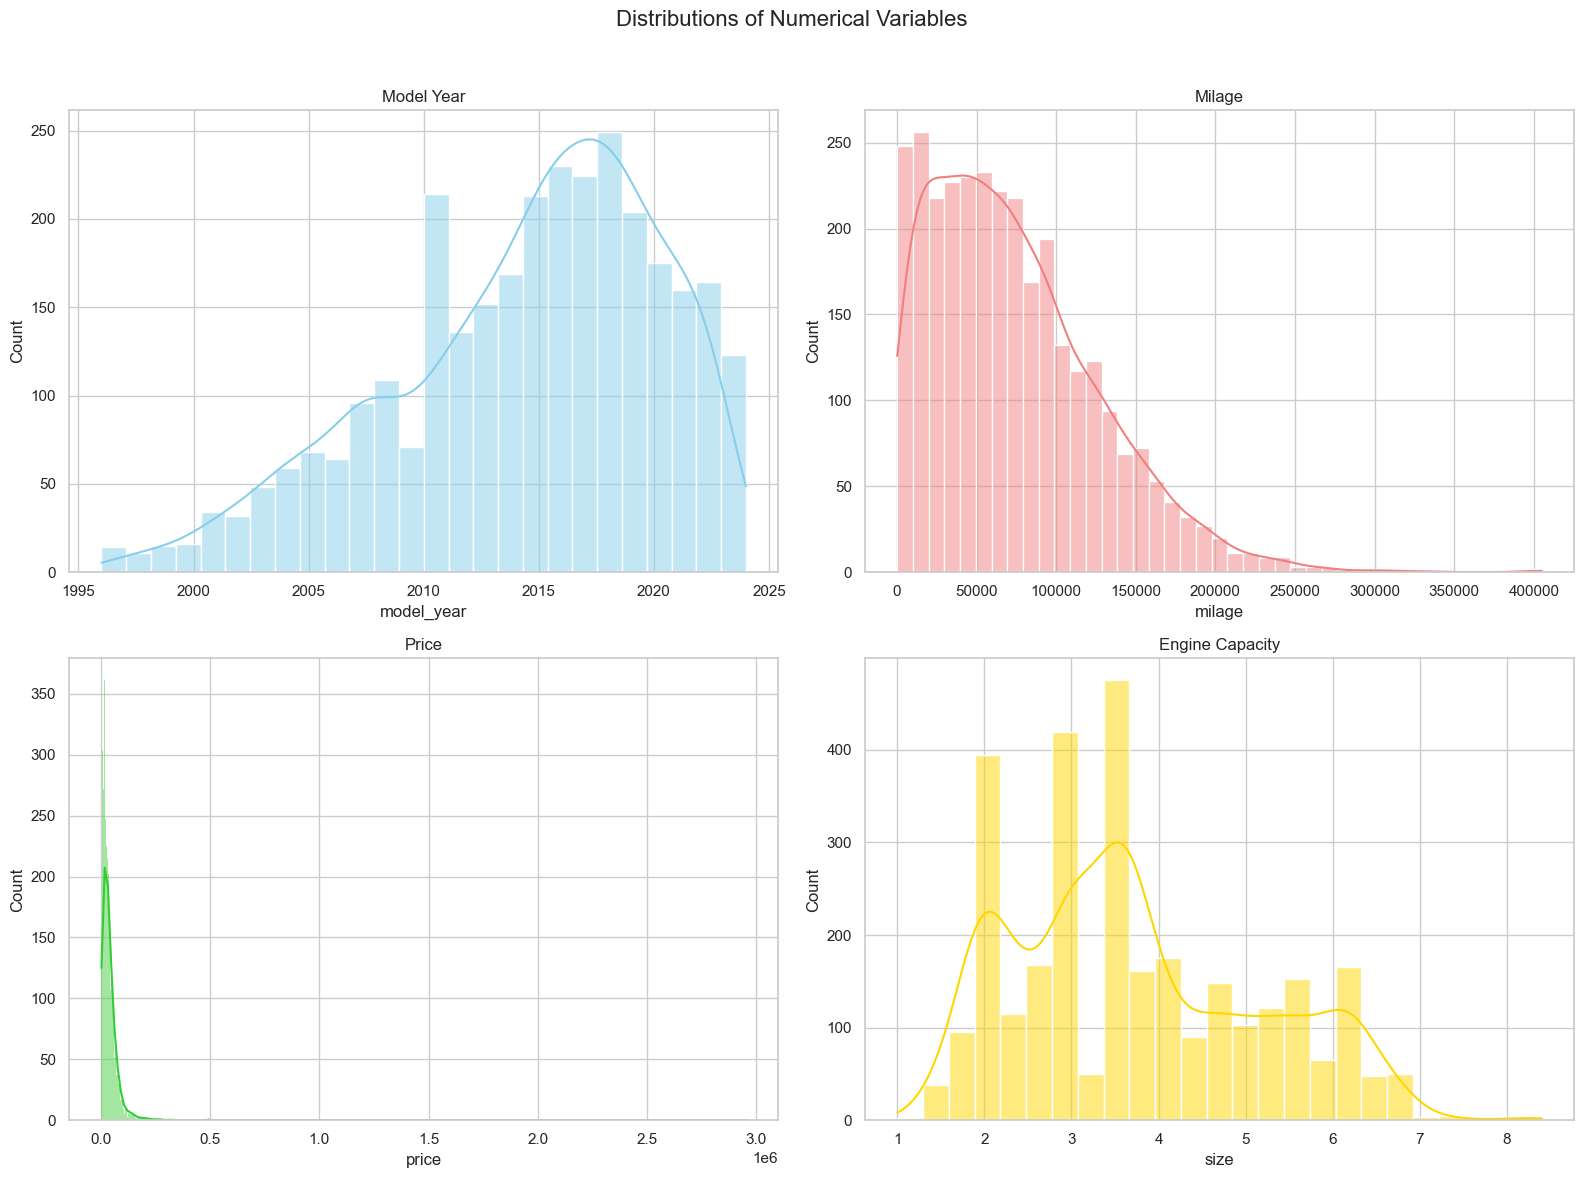

In [36]:
# Set up the plotting style
sns.set(style="whitegrid", palette="muted")

# 1. Visualize distributions for numerical variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distributions of Numerical Variables', fontsize=16)

# Model Year
sns.histplot(df['model_year'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Model Year')

# Milage
sns.histplot(df['milage'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Milage')

# Price
sns.histplot(df['price'], kde=True, ax=axes[1, 0], color='limegreen')
axes[1, 0].set_title('Price')

# Engine Capacity
sns.histplot(df['size'], kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Engine Capacity')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Observations from Distribution Plots:
Model Year:

Most cars are from recent years (2010 onward).
A few cars are older (1974-2000), which may represent vintage or collector vehicles.
Milage:

A right-skewed distribution, with most cars below 100,000 miles.
A small number of cars exceed 300,000 miles, which could be outliers.
Price:

Highly right-skewed with a long tail, indicating a few very expensive vehicles.
Most prices are concentrated below $100,000.
Engine Capacity:

Bimodal distribution with peaks around 2-4 liters.
A few vehicles with extremely high engine capacities (above 6L), potentially high-performance or specialty cars.

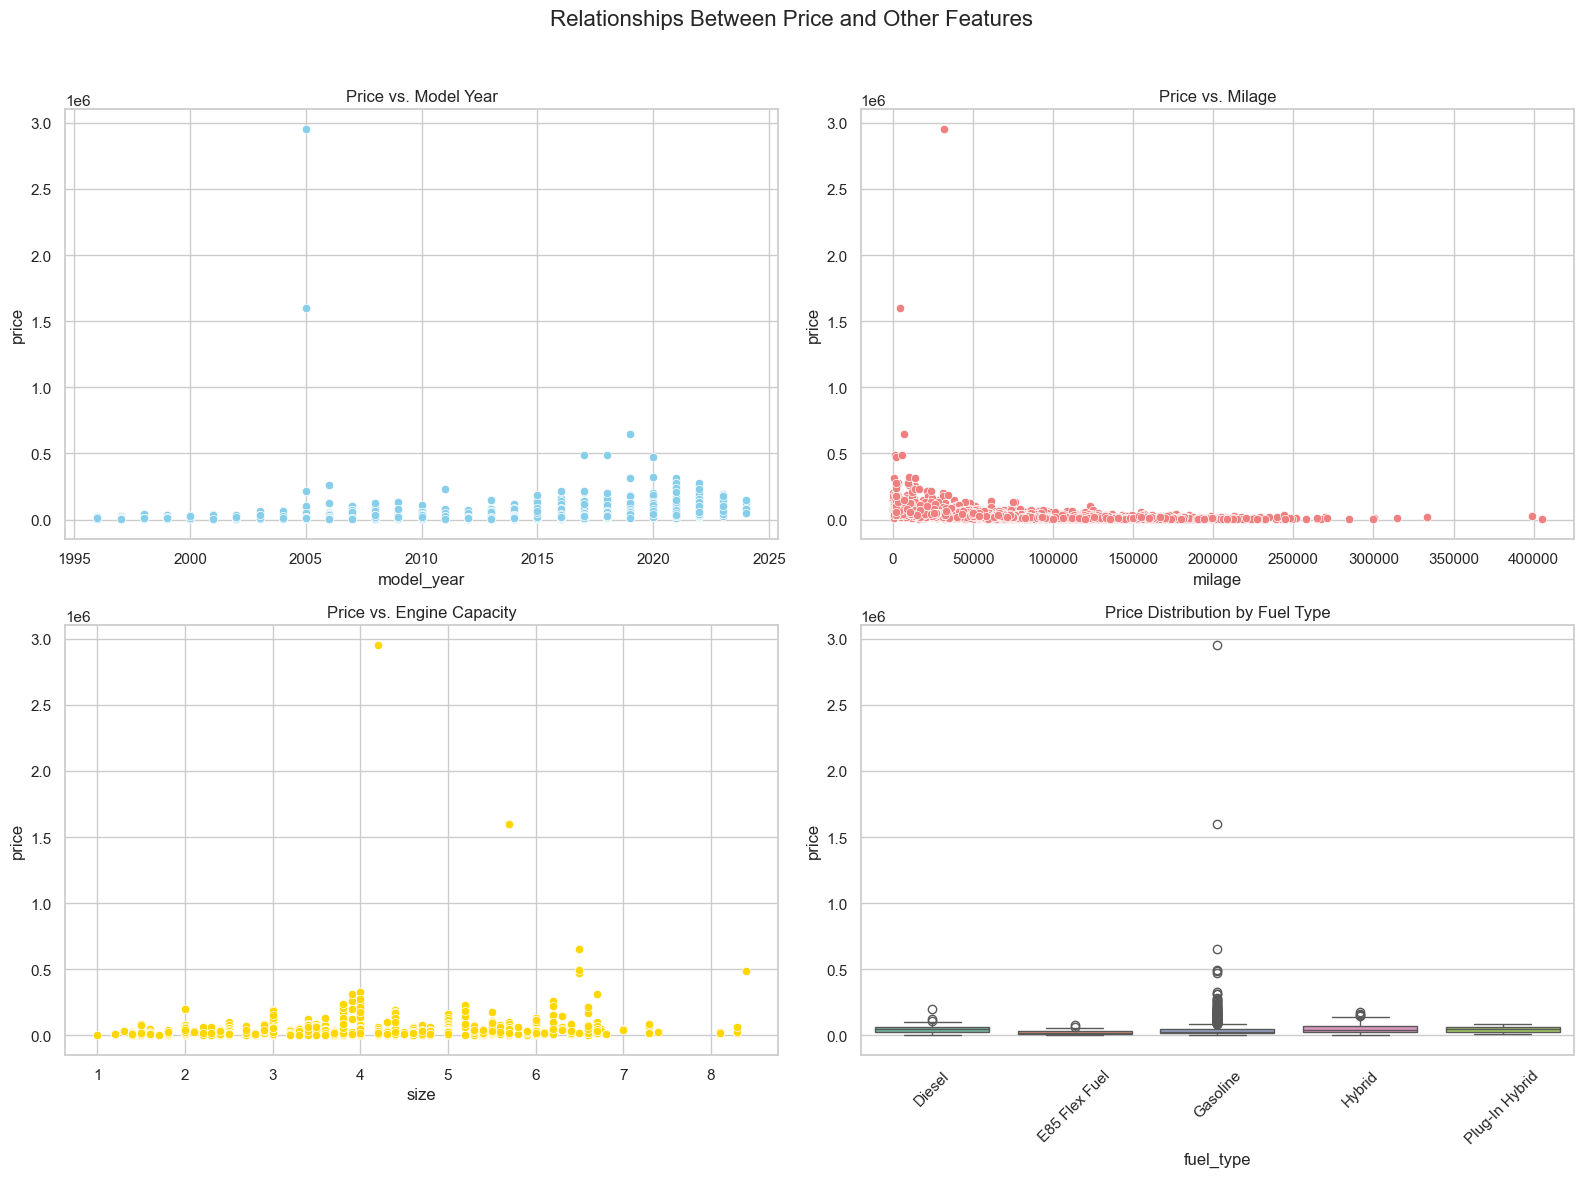

In [38]:
# 2. Analyze relationships between price and other features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Relationships Between Price and Other Features', fontsize=16)

# Price vs. Model Year
sns.scatterplot(x='model_year', y='price', data=df, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Price vs. Model Year')

# Price vs. Milage
sns.scatterplot(x='milage', y='price', data=df, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Price vs. Milage')

# Price vs. Engine Capacity
sns.scatterplot(x='size', y='price', data=df, ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Price vs. Engine Capacity')

# Price Distribution by Fuel Type
sns.boxplot(x='fuel_type', y='price', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Price Distribution by Fuel Type')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Observation(price vs model year): Newer model years likely correlate with higher prices, with some variation by brand and condition. The trend indicates that cars depreciate with age, but certain classic or luxury models may retain value.

Observation(price vs milage): Price tends to decrease as milage increases, reflecting depreciation due to usage. However, there may be exceptions for well-maintained vehicles with high milage.

Observation(price vs engine capacity): Larger engine capacities may command higher prices, but there could be diminishing returns for very large engines. Compact engines may also fetch high prices in fuel-efficient or hybrid vehicles.

Observation(price distribution by fuel type): Fuel type might impact price, with electric and hybrid vehicles typically fetching higher prices. Diesel vehicles may have moderate prices due to durability, while petrol cars vary widely.


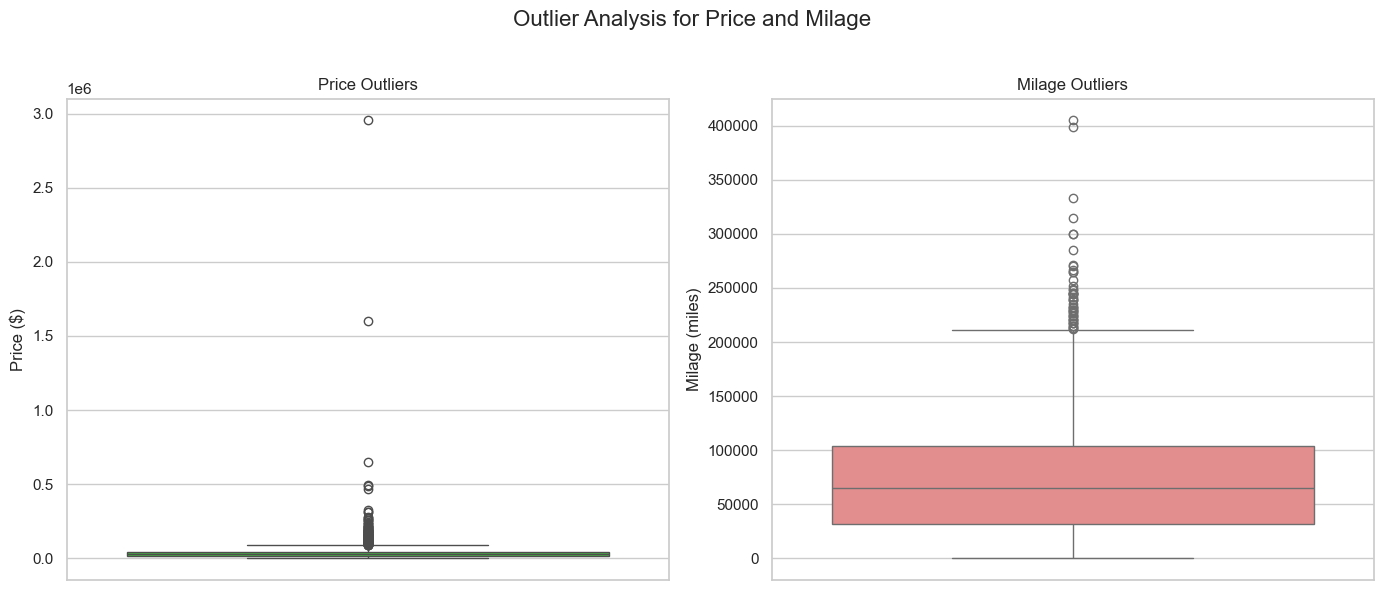

In [39]:
# 3. Identify potential outliers in price and milage
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Outlier Analysis for Price and Milage', fontsize=16)

# Price boxplot
sns.boxplot(y=df['price'], ax=axes[0], color='limegreen')
axes[0].set_title('Price Outliers')
axes[0].set_ylabel('Price ($)')

# Milage boxplot
sns.boxplot(y=df['milage'], ax=axes[1], color='lightcoral')
axes[1].set_title('Milage Outliers')
axes[1].set_ylabel('Milage (miles)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Observations from Outlier Analysis:
Price:

Several extreme outliers above $100,000, including some vehicles priced above $1 million.
These may represent luxury or exotic cars but could also include erroneous data.
Milage:

A few vehicles with mileage exceeding 300,000 miles.
While high-mileage vehicles are not uncommon, these may still warrant closer inspection for accuracy.

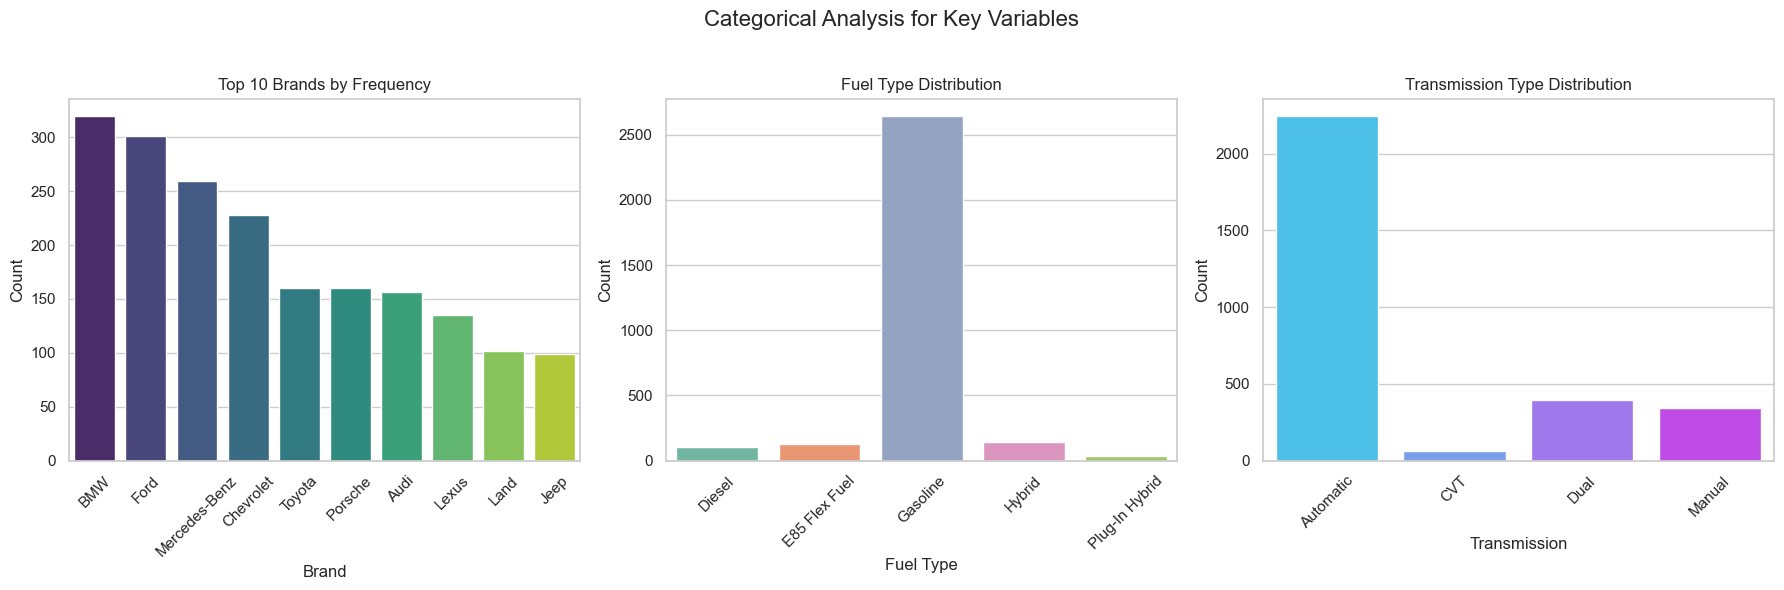

In [41]:
# 4. Perform categorical analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Categorical Analysis for Key Variables', fontsize=16)

# Brand Distribution
brand_counts = df['brand'].value_counts().head(10)  # Top 10 brands
sns.barplot(y=brand_counts.values, x=brand_counts.index, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Brands by Frequency')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Brand')
axes[0].tick_params(axis='x', rotation=45)

# Fuel Type Distribution
fuel_counts = df['fuel_type'].value_counts()
sns.barplot(y=fuel_counts.values, x=fuel_counts.index, ax=axes[1], palette='Set2')
axes[1].set_title('Fuel Type Distribution')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Fuel Type')
axes[1].tick_params(axis='x', rotation=45)

# Transmission Distribution
transmission_counts = df['transmission'].value_counts()
sns.barplot(y=transmission_counts.values, x=transmission_counts.index, ax=axes[2], palette='cool')
axes[2].set_title('Transmission Type Distribution')
axes[2].set_ylabel('Count')
axes[2].set_xlabel('Transmission')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Observation(brand distribution): The most common brands dominate the dataset, reflecting their popularity or availability in the market.

Observation(fuel type distribution): Certain fuel types, such as petrol and diesel, are likely more common, whereas electric might be less frequent but growing.

Observation(transmission distribution): Automatic transmissions may be more prevalent in newer or premium cars, while manual might dominate older or budget models.


